# Linear Regression Practice

Adapted from http://www.ritchieng.com/machine-learning-linear-regression/

## 1. Reading Data using Panda

In [67]:
# conventional way to import pandas
# NOMBRE : JOSE HUGO JAITA AGUILAR
import pandas as pd
import numpy as np

In [68]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
#data.head()
data['TV'].head()

1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64

In [69]:
# display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [70]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

What are the features?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
What is the response?

- **Sales**: sales of a single product in a given market (in thousands of items)

What else do we know?

Because the response variable is continuous, this is a **regression problem**.
There are 200 observations (represented by the rows), and each observation is a single market.


## 2. Visualizing Data

- Seaborn: Python library for statistical data visualization built on top of Matplotlib
- Anaconda users: run conda install seaborn from the command line

In [71]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

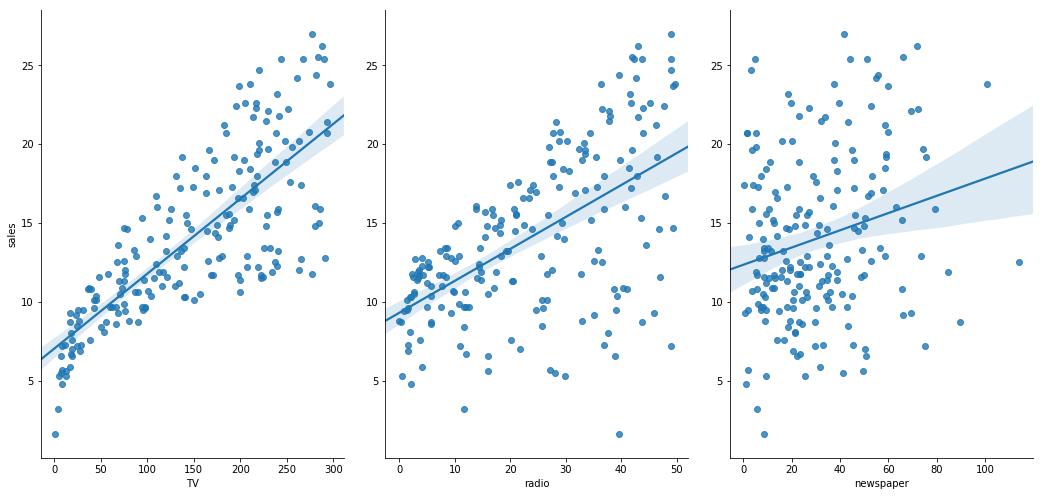

In [72]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

Linear regression
- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

## 3. Computing Linear Regression (Scikit-learn)

## Form of linear regression
$$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
- $y$  is the response
- $\theta_0$  is the intercept
- In this case:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times Newspaper$$


scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
However, pandas is built on top of NumPy
Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [73]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = pd.DataFrame(data, columns=feature_cols) 

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]
# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [74]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [75]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#y = data.Sales (python 2)

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Splitting X and y into training and testing sets

In [76]:
# import  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear Regression

In [88]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
## Excercise 1 
# Try your own linear regression algorithm

def gradientDescent(X, y, alpha, num_iters):
    n,num_features = X.shape
    theta_0 = 0
    theta = np.zeros(num_features)
    x_trans = X.transpose()
    for i in range(0, num_iters):
        prediction = np.dot(X, theta)
        prediction[:] += theta_0
        loss = prediction - y
        theta_0 -= alpha*(1/n)*np.sum(loss)
        gradient = np.dot(x_trans, loss) / n
        theta -= alpha * (1/n) * gradient
    #theta = np.array([theta_0,theta[0],theta[1],theta[2]])
    theta = np.append([theta_0],theta)
    return theta


num_iters = 100000
alpha = 0.001
print("corriendo nuestro regresor lineal")
theta = linearRegressionLeti2(X_train, y_train, alpha, num_iters)
print("los valores de theta son :")
print(theta)

corriendo nuestro regresor lineal
los valores de theta son :
[ 2.87696601  0.04656457  0.17915813  0.00345047]


## Interpreting model coefficients

In [93]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [94]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

$$ y= 2.88 +0.0466 \times TV+0.179 \times radio + 0.00345 \times Newspaper $$
How do we interpret the TV coefficient (0.0466)?
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.


## Making Predictions

In [95]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values.

## 4. Model evaluation metrics for regression

we need evaluation metrics designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:


In [96]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

In [97]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$
    

In [98]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$
    

In [99]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions

In [100]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [113]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [120]:
## Excercise 2, try nonlinear features and measure the RMSE
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]
X['TV'] = X['TV']*X['radio']


# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.08348533587


/home/jose/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
